In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
import keras
from keras import Sequential, layers
import matplotlib.pyplot as plt


Taille d'une image : (28, 28)


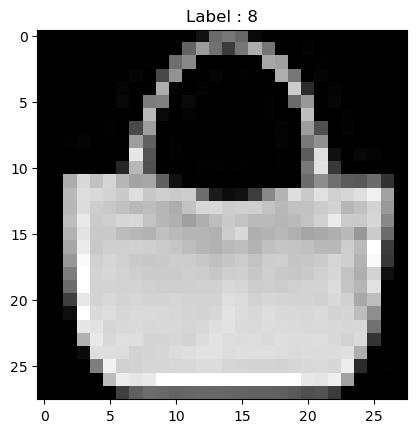

In [10]:

# --- Chargement du jeu de données Fashion MNIST ---
fashion = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()

print("Taille d'une image :", x_train[0].shape)

# --- Affichage d'un exemple ---
plt.imshow(x_train[100], cmap='gray')
plt.title(f"Label : {y_train[100]}")
plt.show()

# --- Prétraitement des données ---
# Normalisation des pixels (entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Ajout d'une dimension de canal (niveaux de gris)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# --- Création du modèle ---
model = Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (4, 4), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Réduction du surapprentissage
    layers.Dense(10, activation='softmax')  # 10 classes (articles de mode)
])




In [11]:
# --- Compilation du modèle ---
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Résumé du modèle ---
model.summary()

# --- Entraînement du modèle ---
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,  # 10 pour la validation
    verbose=1
)

# --- Évaluation du modèle sur le test set ---
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# --- Sauvegarde du modèle ---
model.save("fashion.keras")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,858 (854.91 KB)

 Trainable params: 218,858 (854.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.8355 - loss: 0.4525 - val_accuracy: 0.8848 - val_loss: 0.3147
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8918 - loss: 0.2975 - val_accuracy: 0.8982 - val_loss: 0.2730
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9077 - loss: 0.2521 - val_accuracy: 0.9087 - val_loss: 0.2480
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9183 - loss: 0.2215 - val_accuracy: 0.9100 - val_loss: 0.2404
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9266 - loss: 0.1982 - val_accuracy: 0.9117 - val_loss: 0.2452
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9331 - loss: 0.1779 - val_accuracy: 0.9178 - val_loss: 0.2316
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9407 - loss: 0.1586 - val_accuracy: 0.9207 - val_loss: 0.2293
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9462 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step 
Nombre de prédictions correctes : 9184
Nombre de prédictions incorrectes : 816


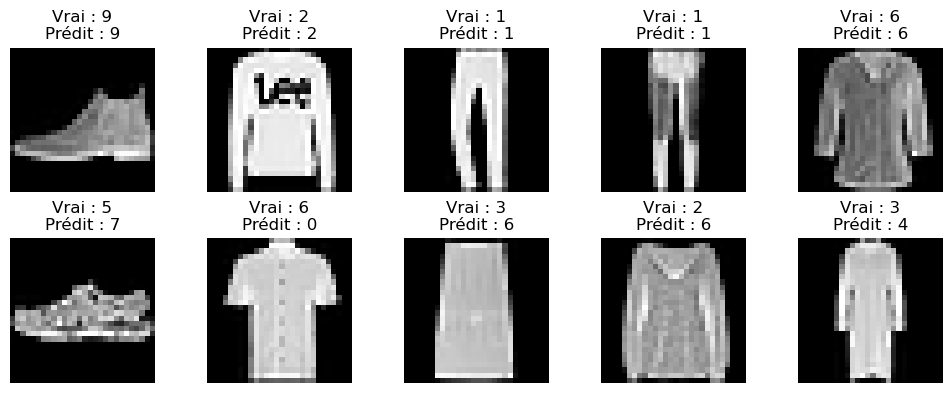

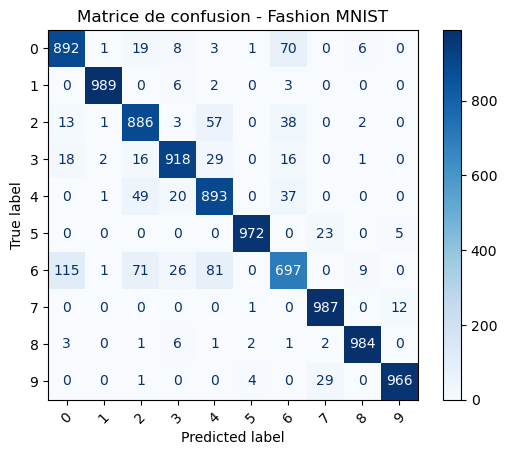

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#vérification des prédictions
# Prédictions sur le jeu de test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Indices des bonnes et mauvaises prédictions
correct_indices = np.nonzero(y_pred_classes == y_test)[0]
incorrect_indices = np.nonzero(y_pred_classes != y_test)[0]

print(f"Nombre de prédictions correctes : {len(correct_indices)}")
print(f"Nombre de prédictions incorrectes : {len(incorrect_indices)}")

# --- Affichage de quelques exemples bien et mal classés ---
plt.figure(figsize=(10, 4))
for i, correct in enumerate(correct_indices[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[correct].reshape(28, 28), cmap='gray')
    plt.title(f"Vrai : {y_test[correct]}\nPrédit : {y_pred_classes[correct]}")
    plt.axis('off')

for i, incorrect in enumerate(incorrect_indices[:5]):
    plt.subplot(2, 5, i + 6)
    plt.imshow(x_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title(f"Vrai : {y_test[incorrect]}\nPrédit : {y_pred_classes[incorrect]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# --- Matrice de confusion ---
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matrice de confusion - Fashion MNIST")
plt.show()